# Estatística para Ciência de Dados

https://docs.scipy.org/doc/scipy/reference/stats.html

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as sct
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
atlh = pd.read_csv('athletes1.csv', usecols=['height'])

•	O que é Estatística?
Conjunto de técnicas que permite de forma sistemática organizar, descrever, analisar e interpretar dados advindos de diversas origens, a fim de extrair deles conclusões. Pode ser subdividida em quatro áreas:

**1.	Descritiva:**

    a.	Organizar e descrever os dados, que podem ser expressos em tabelas e gráficos.

    b.	Dividida em dois grupos:

            i.	Medidas de Tendência Central (concentração dos dados:  média, moda, mediana e medidas separatrizes)

            ii.	Medidas de Dispersão (grau de dispersão dos dados em torno de uma medida de tendência: desvio padrão, variância e coeficiente de variação)


**2.	Probabilidade:**

    a.	Descrever fenômenos aleatórios, ou seja, aqueles em que está presente a incerteza.


**3.	Amostragem:**

    a.	Técnica para selecionar uma amostra da população, com o objetivo de obter informações de uma ou mais características de interesse, as quais permitam chegar a conclusões a respeito dos parâmetros.

            i.	População (N): Todos indivíduos que possuem determinadas características, as quais estamos interessados em estudar.

            ii.	Amostra (n): Subconjunto da população, uma parte dos indivíduos que possuem determinadas características.


**4.	Inferencial:**

        a.	Conjunto de técnicas que possibilitam a extrapolação (processo de estimar, além do intervalo de observação original, o valor de uma variável com base em sua relação com outra variável), a um grande conjunto de dados, das informações e conclusões obtidas a partir da amostra.

**	Conceitos Básicos:**

    o	Censo: Exame de todos os elementos da população;

    o	Dados Brutos: Dados na forma mais primitiva, após coleta;

    o	Rol: Dados já ordenados, em ordem crescente ou decrescente.

    o	Dados Tabelados: Expressos em tabelas de frequência simples ou acumuladas:

        	Simples: Contagem simples de elementos;
        	Acumulada: Contagem acumulada até a classe de interesse;
        	Relativa Simples: Contagem simples divididos pela soma das frequências simples (proporção ou percentual);
        	Relativa Acumulada: Contagem acumulada até a classe de interesse, dividida pela soma das frequências simples (proporção ou percentual);

        	Distribuição de Frequência em Classes: Para grandes conjuntos de dados, agrupamos em classes para termos uma boa ideia do comportamento.
        
        •	Regra de Sturges
 

**	Variáveis:**
    
    o	Qualitativas (qualidade):

        	Nominal (sem ordem implícita: sexo, cor dos olhos, fumante, doente)

        	Ordinal (ordem implícita: classe social, grau de instrução e estágio de doença)

    o	Quantitativas (número):

        	Contínua (resultados pertencem a um intervalo de números reais e resultados de mensuração: peso, altura, salário)

        	Discreta (finita e enumerável – contagem: nº de filhos, carros, cigarros fumados por dia)


# Descritiva

## Medidas de Tendência Central

**•	Média Aritmética:** Soma das observações pelo total de observações;
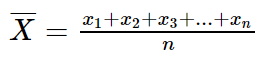

DataFrame.mean(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)

axis : {index (0), columns (1)} - Axis for the function to be applied on.

skipna : bool, default True - Exclude NA/null values when computing the result.


In [6]:
atlh.mean()

height    1.766282
dtype: float64

**•	Média Geométrica:** Está relacionado à crescimento proporcional, como por exemplo, a taxa de crescimento de laranjas acarretadas de uma laranjeira. Produto das observações pela sua raiz enésima;
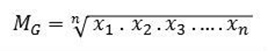

In [11]:
#Exemplo
laranja = [180, 210, 300]
medgeo = sct.mstats.gmean(laranja, axis=0)
medgeo

224.6661716165552

**•	Média Harmônica:** Está relacionada ao cálculo matemático das situações envolvendo as grandezas inversamente proporcionais. Como exemplo, temos a relação entre velocidade e tempo. Número de observações sobre o inverso das observações;
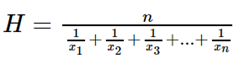

In [12]:
#Exemplo
vel = [40, 60]
medhar = sct.mstats.hmean(vel, axis=0)
medhar

47.99999999999999

o	Relação entre as médias: MA >= MG >= MH (Só serão iguais, caso o conjunto seja igual.)

**•	Média Ponderada:** Soma das observações multiplicadas pela sua frequência ou peso, dividido pela quantidade de observações.
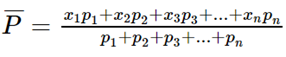

In [13]:
#Exemplo
notas = [7, 5, 4, 10]
peso = [2, 3, 4, 1]

medpon = np.average(notas, weights=peso)
medpon

5.5

**•	Mediana:** Ordena os dados de forma crescente ou decrescente (em rol), calcula a quantidade de observações, se par, (n/2) e (n/2 + 1) – haverá duas posições, se ímpar: (n+1/2) – apenas uma posição.

DataFrame.median(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)

In [31]:
atlh.median()

height    1.76
dtype: float64

**•	Medidas Separatrizes:** Dividir o conjunto de dados em n partes iguais e proporcionar uma melhor ideia da dispersão do conjunto, principalmente da simetria ou assimetria da distribuição – quartis e percentis:

**o	Quartis:** Dividem o conjunto, ordenados em ordem crescente, em quatro partes iguais:

        Primeiro Quartil (Q1): dados 25% para baixo e 75% para cima;
        Segundo Quartil(Q2): dados 50% para baixo e 50% para cima;
        Terceiro Quartil (Q3): dados 75% para baixo e 25% para cima;

        Posição do quartil inferior = (n + 1) / 4
        Posição do quartil superior = [3x(n+1)] / 4

        Distância Interquartil: Q3 – Q1
        
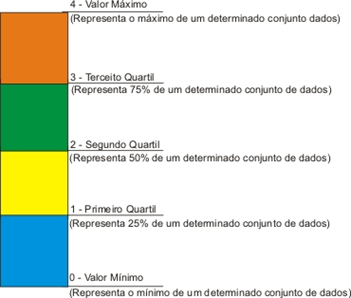


	Assimetria e Dispersão pelos Quartis:

i.	Simétrico
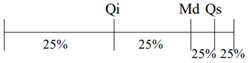
ii.	Simétrico com maior dispersão
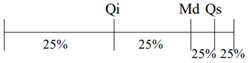 
iii.	Assimétrico para a direita
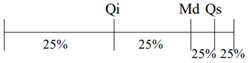 
iv.	Assimétrico para a esquerda
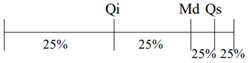

DataFrame.quantile(self, q=0.5, axis=0, numeric_only=True, interpolation='linear')


quartis = dataframe.quantile([0.25,0.5,0.75])


In [33]:
quartis = atlh.quantile([0.25,0.5,0.75])
quartis

,height
0.25,1.69
0.50,1.76
0.75,1.84


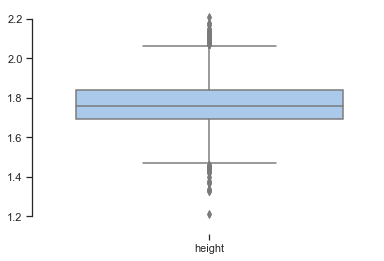

In [16]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(data=atlh)
sns.despine(offset=10, trim=True)

**o	Percentis:** Dividem o conjunto em cem partes iguais

P25 = Q1

P50 = Q2

P75 = Q3


In [ ]:
a = np.array([[10, 7, 4], [3, 2, 1]])
np.percentile(a, 50)
np.percentile(a, 50, axis=0)
array([6.5, 4.5, 2.5])
>>> np.percentile(a, 50, axis=1)
array([7.,  2.])
>>> np.percentile(a, 50, axis=1, keepdims=True)


**•	Moda:** Valor que possui a maior frequência simples do conjunto de dados;

    o	Uni modal: Uma única moda;

    o	Bimodal: Duas observações mais frequentes;

    o	Multimodal: Mais de duas observações mais frequentes;

    o	Amodal: Moda não existe.

DataFrame.mode(self, axis=0, numeric only=False, dropna=True)

moda = df.groupby(by='estado_residencia')['pontuacao_credito'].agg(lambda x: x.mode()[0])


In [26]:
moda = atlh.mode()
moda

,height
0,1.8


In [36]:
moda = atlh.agg(lambda x: x.mode()[0])
moda

height    1.8
dtype: float64

## Medidas de Dispersão

**•	Variância:** Medida de dispersão que mostra quão distantes os valores estão da medida central (média). Quanto menor é a variância, mais próximos os valores estão da média; mas quanto maior ela é, mais os valores estão distantes da média
DataFrame.var(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)

**o	Variância Amostral:**
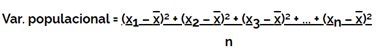

**o	Variância Populacional:** Se quisermos calcular a variância populacional, consideraremos todos os elementos da população, e não apenas de uma amostra. Nesse caso, o cálculo possui uma pequena diferença.
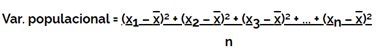

In [39]:
#Variância
atlh.var()

height    0.012706
dtype: float64

**•	Desvio Padrão:** É simplesmente o resultado positivo da raiz quadrada da variância. Na prática, o desvio padrão indica qual é o “erro” se quiséssemos substituir um dos valores coletados pelo valor da média.

dp = √var

média aritmética (x) ± desvio padrão (dp)

DataFrame.std(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)

Obs: Padronizar a variável para ter média 0 e variância 1

**standardized = sct.zscore(variável)**


In [40]:
#Desvio Padrão
atlh.std()

height    0.112719
dtype: float64

**•	Amplitude:** Medida simples sobre a dispersão dos dados, define-se entre a diferença do maior e o menor valor - R(Range).

In [14]:
print(atlh.max() - atlh.min())

height    1.0
dtype: float64


**•	Covariância:** Em probabilidade, a covariância de duas variáveis X e Y é uma medida da variabilidade conjunta destas variáveis aleatórias. Se as variáveis tem covariância positiva tendem a mostrar um comportamento semelhante, ou seja, os menores(maiores) valores da variável X corresponde aos menores(maiores) da variável Y . Se a covariância é negativa então as variáveis tendem a mostrar um comportamento oposto, ou seja, os menores(maiores) valores da variável X corresponde aos maiores(menores) da variável Y.

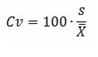
 
DataFrame.cov(self, min_periods=None) 


In [41]:
atlh.cov()

,height
height,0.012706


**•	Coeficiente de Correlação:** São métodos estatísticos para se medir as relações entre variáveis e o que elas representam.O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

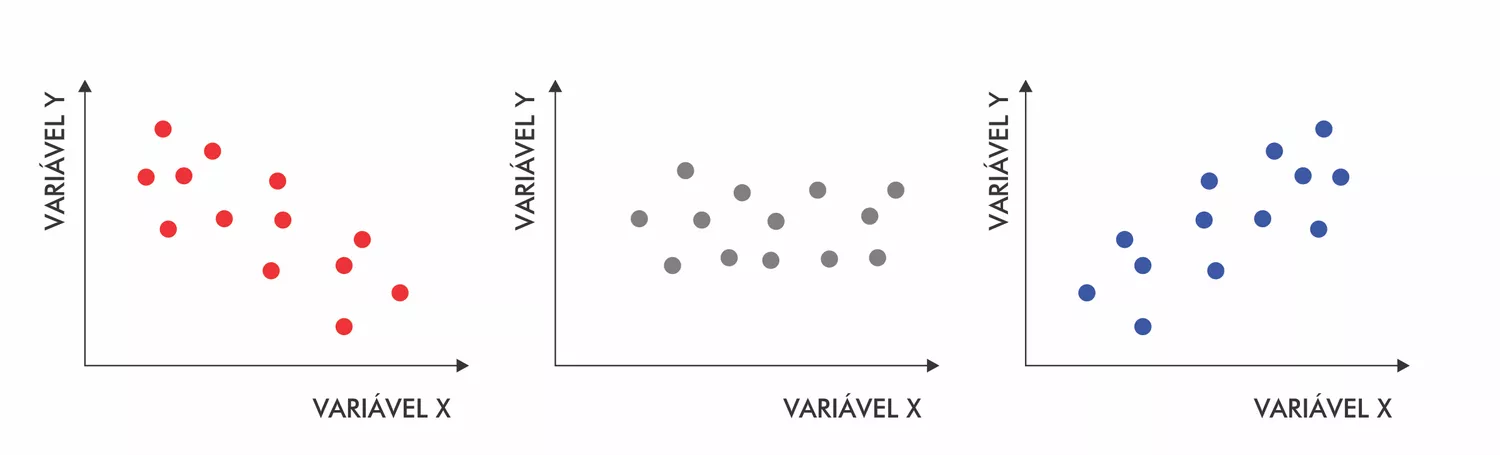

    o Coeficiente de Pearson: O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1. Quando  o coeficiente de correlação se aproxima de 1, nota-se um aumento no valor de uma variável quando a outra também aumenta, ou seja, há uma relação linear positiva. Quando o coeficiente se aproxima de -1, também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de correlação negativa ou inversa.
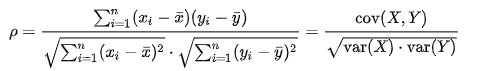

    o Coeficiente de Correlação de Spearman: Denominado pela letra grega rho (ρ), o coeficiente de correlação de postos de Spearman é uma medida de correlação não paramétrica também avaliado no intervalo entre -1 e 1. Ao contrário do coeficiente de Pearson, o coeficiente de Spearman não exige a suposição de que a relação entre as variáveis seja linear, nem requer que as mesmas sejam quantitativas – pode inclusive ser utilizado para verificar relação entre variáveis medidas no nível ordinal.

    o Coeficiente de Correlação de Kendall: Expresso pela letra grega tau (τ), o coeficiente de correlação de Kendall é uma medida de associação para variáveis ordinais. Uma vantagem de tau sobre o coeficiente de Spearman é a possibilidade de ser generalizado para um coeficiente de correlação parcial.

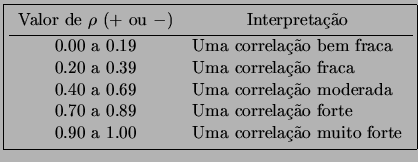

In [46]:
atlh.corr()
#method : {'pearson', 'kendall', 'spearman'}

,height
height,1.0


In [45]:
#Pearson
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
sct.pearsonr(a, b)

(0.8660254037844386, 0.011724811003954649)

In [47]:
sct.spearmanr([1,2,3,4,5], [5,6,7,8,7])

SpearmanrResult(correlation=0.8207826816681233, pvalue=0.08858700531354381)

In [49]:
x1 = [12, 2, 1, 12, 2]
x2 = [1, 4, 7, 1, 0]
sct.kendalltau(x1, x2)

KendalltauResult(correlation=-0.4714045207910316, pvalue=0.2827454599327748)

**•	Gráfico de Dispersão:** É uma representação gráfica da possível relação entre duas variáveis e, dessa forma, mostra de forma gráfica os pares de dados numéricos e sua relação.

    Correlação positiva: quando há uma aglomeração dos pontos em tendência crescente, significa que conforme uma variável aumenta, a outra variável também aumenta. Por exemplo, no caso da relação entre temperatura e número de sorvetes vendidos, temos uma relação positiva.

    Correlação negativa: quando os pontos se concentram em uma linha que decresce, significa que conforme uma variável aumenta, a outra variável diminui, ou seja, quanto maior for a ocorrência de um dos dados, menor será a ocorrência do outro dado. Por exemplo, se correlacionarmos a taxa de natalidade com a riqueza de um país, veremos que quanto mais rico um país, menor é a taxa de natalidade.
    
    Correlação nula: quando há uma grande dispersão entre os pontos ou eles não seguem tendência positiva nem negativa, significa que não há nenhuma correlação aparente entre as variáveis.
    
    Forte: Quanto menor for a dispersão dos pontos, maior será a correlação entre os dados.
    
    Fraca: Quanto maior for a dispersão dos pontos, menor será o grau entre os dados.

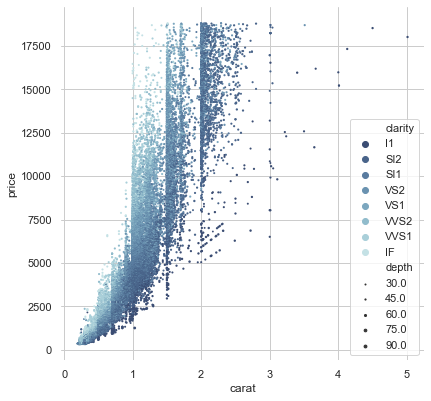

In [23]:
sns.set(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

## Outliers (valor atípico)

Por definição, é uma observação que apresenta um grande afastamento dos demais dados da série (que está "fora" dela), ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos testes estatísticos aplicados às amostras.

Um dos métodos é o do escore z, ou do desvio-padrão. Neste método, será considerado outlier o valor se encontrar a uma determinada quantidade de desvios padrões da média. A quantidade destes desvios pode variar conforme o tamanho da amostra.

Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

    1. Os outliers podem viesar negativamente todo o resultado de uma análise;
    2. O comportamento dos outliers pode ser justamente o que está sendo procurado.

Existem diversas saídas, algumas delas são

    a) excluir as observações discrepantes da amostra de dados: quando o dado discrepante é fruto de um erro de input dos dados, então ele precisa ser removido da amostra;

    b) realizar uma análise separada apenas com os outliers: esta abordagem é útil quando se quer investigar casos extremos, como alunos que só tiram notas boas, empresas que apresentam lucro mesmo em tempos de crise, casos de fraudes, entre outros.

    c) utilizar métodos de clusterização para encontrar uma aproximação que corrige e dá um novo valor aos dados outliers: em casos de erros no input dos dados, ao invés de excluir e perder uma linha inteira de registros devido a uma única observação outlier, uma solução é utilizar algoritmos de clusterização que encontram o comportamento das observações mais próximas ao dado outlier e fazem inferência de qual seria o melhor valor aproximado.

In [3]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# gerador de números randômicos
seed(1)

# gerando variáveis
data = 5 * randn(10000) + 50

# calcular sumário estatístico
data_mean, data_std = mean(data), std(data)

# identificar outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identificar outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remover outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


## Distribuição Normal

A distribuição normal (também conhecida como distribuição gaussiana) é sem dúvida a mais importante distribuição contínua. 
Esse tipo de distribuição se apresenta em formato de sino, com a área sob a curva que expressa a função de densidade da probabilidade igual a 1, uni modal, simétrica em relação a sua média (μ) e tende a zero quando se afasta da média. A soma de efeitos independentes (ou efeitos não muito correlacionados) deveriam, se houvessem muitos desses, se distribuir normalmente (sempre sujeito a certos pressupostos).

Utilizando a biblioteca Scipy – import scipy.stats as sct

Normal = sct.norm.rvs(loc=10, scale=3, size=1000) - (random variates)

(loc é a média, scale é o desvio padrão, size são os valores)
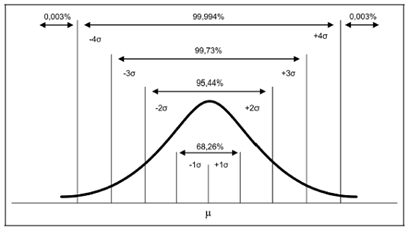

A probabilidade de X assumir μ - σ e μ + σ é de 68,27%

A probabilidade de X assumir μ - 2σ e μ + 2σ é de 95,45%

A probabilidade de X assumir μ - 3σ e μ + 3σ é de 99,73%

A maior parte dos valores que X pode assumir, numa distribuição normal, se concentra em torno da média e vai ficando cada vez mais difícil de assumir valores no sentido das caudas.

A área embaixo da curva são probabilidades. Essa área é a CDF.


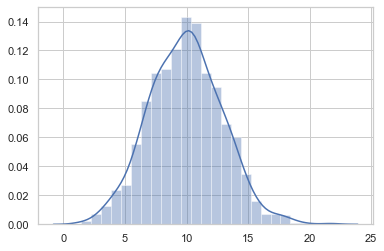

In [30]:
#loc é a média, scale é o desvio padrão
Normal = sct.norm.rvs(loc=10, scale=3, size=1000)
sns.distplot(Normal)

**•	Curtose:** Medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade.
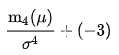
o	Se o valor da curtose for = 0: Então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas.

o	Se o valor é > 0 (ou > 3): , então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão).

o	Se o valor é < 0 (ou < 3), então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se platicúrtica


In [33]:
curtose = sct.kurtosis(Normal)
curtose

0.11872144979280197

**•	Obliquidade (Assimetria):** A obliquidade (ou skewness, em inglês) trata-se de uma medida de assimetria de uma distribuição de probabilidade em torno de sua média. Ela pode assumir valores negativos, positivos ou próximos de 0. No primeiro caso, a cauda da distribuição é mais alongada à esquerda e, por consequência, a distribuição dos dados concentra-se mais à direita no
seu respectivo gráfico. No segundo caso, a cauda da distribuição é mais alongada para a esquerda, o que aponta uma maior concentração dos dados à direita do seu respectivo gráfico. Por fim, no terceiro caso, a distribuição possui caudas aproximadamente balanceadas e, como resultado, ela terá uma maior simetria.

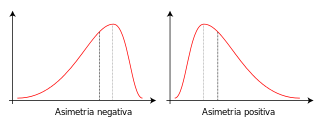

In [32]:
obliquidade = sct.skew(Normal)
obliquidade

0.1457554448662725

**•	Função de Distribuição Acumulada (CDF):** A função de distribuição acumulada descreve como probabilidades são associadas aos valores ou aos intervalos de valores de uma variável aleatória. É a probabilidade de obtermos um valor menor ou igual para x.

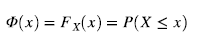

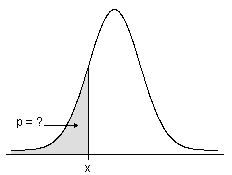

In [35]:
#Para encontrar x <= 8 com a função cdf:
sct.norm.cdf(8, loc=10, scale=3)

0.2524925375469229

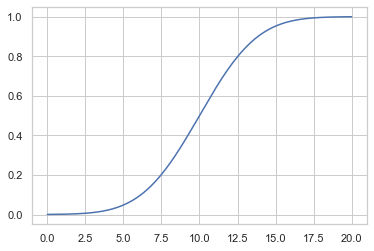

In [36]:
x = np.linspace(0, 20, num=1000)
f = lambda x: sct.norm.cdf(x, loc=10, scale=3)
cdf = f(x)
sns.lineplot(x, cdf)

**•	Função Empírica de Distribuição Acumulada (ECDF):** A função Empírica de distribuição acumulada, é uma função que promove um caminho para modelar e adquirir amostras de probabilidades cumulativas de *datasets* que não se encaixam em uma distribuição normal padrão. É calculada, ordenando todos os valores únicos


In [52]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF([3, 3, 1, 4])
ecdf([3, 55, 0.5, 1.5])

array([0.75, 1.  , 0.  , 0.25])

**•	Complemento da Função CDF:** Probabilidade da outra ponta da função (1 - cdf).

In [37]:
#Para encontrar o complemento x >= 8 com a função sf:
sct.norm.sf(8, loc=10, scale=3)

0.7475074624530771

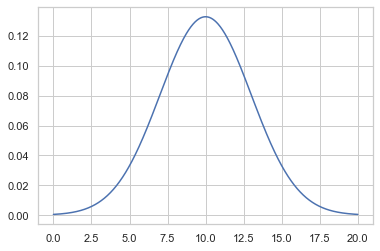

In [44]:
x = np.linspace(0, 20, num=1000)
f = lambda x: sct.norm.pdf(x, loc=10, scale=3)
pdf = f(x)
sns.lineplot(x, pdf)

**•	Valor para determinada probabilidade:** Para encontrar determinado valor (X) para uma probabilidade acumulada da distribuição.

    o Cauda à esquerda (ppf): P(X <= x) = *Probabilidade*
    
    o Cauda à direita (isf): P(X >= x) = *Probabilidade*

In [40]:
#Qual valor de X que acumula 25% da probabilidade? 
sct.norm.ppf(0.25, loc=10, scale=3)

7.976530749411754

In [41]:
#Qual valor de X que acumula 25% da probabilidade? 
sct.norm.isf(0.25, loc=10, scale=3)

12.023469250588246

**•	Função da Densidade de Probabilidade:** É uma função que descreve a probabilidade relativa de uma variável aleatória tomar um valor dado. 

    Probabilidade (área da normal):
	1. Para determinarmos a probabilidade de um valor, devemos fazer:
	2. Normalizar a distribuição (média igual a 0 e desvio padrão igual a ±1 - **standardized = sct.zscore(variável)**) 
	3. Achar o “z” (z-score), pela fórmula:
                                Z=  (X- μ)/σ


In [43]:
#Utilizando a função da densidade de probabilidade, achar igual a 8
sct.norm.pdf(8, loc=10, scale=3)

0.10648266850745075

## Testes de Normalidade *(Teste de Hipóteses)*

Testes de Normalidade são processos estatísticos usados para determinar se uma amostra de dados ou qualquer grupo de dados se encaixa a uma distribuição normal. Esses testes podem ser feitos tanto de maneira matemática quanto gráfica. Teste de hipóteses fazem parte de um campo da estatística conhecido como inferência estatística. A ideia é que você consiga validar:

**1. Uma afirmação acerca de um parâmetro da população.**

Exemplo: 100 funcionários de uma determinada empresa foram selecionados aleatoriamente e foi constatado que a média de idade destes funcionário é 40 anos. É válido dizer que a empresa inteira tem média de idade igual a 40 anos?

As inferências são feitas por meio do teste de duas hipóteses: uma hipótese nula (H0) e uma hipótese alternativa (H1 ou Ha). Não deve existir sobreposição de resultados entre estas duas hipóteses, ou seja, quando uma delas for verdadeira, a outra necessariamente deve ser falsa. Por este motivo, ao formular H0 e H1, siga as seguintes orientações:

**Formule a hipótese H0 utilizando os sinais de <=, =, >=**

**Formule a hipótese H1 utilizando os sinais de <, #, >**

*H0 = A média de idade da empresa é igual a 40 anos*

*H1 = A média de idade da empresa é diferente de 40 anos*

Lembre-se, dada as orientações de formulação de hipóteses citadas acima, você poderia pensar em diferentes hipóteses para formular H0 e H1. Acima foi dado apenas um dos possíveis pares de hipóteses.

Tecnicamente falando, você quer testar se um determinado valor observado (vamos chamar de Z observado ou T observado) pertence ou não pertence à uma determinada região crítica (vamos chamar de RC).

Se o valor observado (*test statistic*) estiver dentro (pertence) da sua região crítica, então você rejeita sua hipótese nula H0 e, automaticamente, aceita sua hipótese alternativa H1 (ou vice-versa). Portanto, se o seu valor observado estiver dentro da área azul desta distribuição (RC), você vai rejeitar a hipótese nula H0 e aceitar a hipótese alternativa H1 (ou vice-versa).  

Veja na imagem abaixo o que é essa região crítica de que estamos falando:

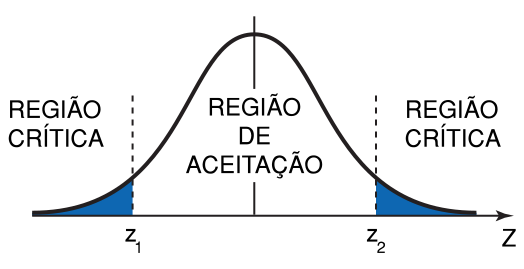

**Erro**

Nenhum teste pode lhe garantir 100% de acerto na inferência que foi feita. Desta forma, é importante saber se existem dois tipos de erros associados aos testes de hipóteses:

Tipo I: rejeita-se H0 quando, na verdade, H0 é verdadeira

Tipo II: aceita-se H0, quando, na verdade, H0 é falsa

Estes erros estão conectados, de forma que, quando um diminui, o outro aumenta. A única forma de reduzir os dois erros ao meso tempo é por meio do aumento da amostra.

**Nível de significância (alpha)**

Nível se significância refere-se à maior probabilidade permissível para que se cometa um erro do tipo I. Este nível de significância é comumente representado por alpha. É bastante comum o uso de 5% (0.05) como nível de significância. No entanto, isso depende do seu objetivo. Por exemplo, muitos testes A/B utilizam 1% como nível de significância.

Se subtrairmos 1 – nível de significância, teremos o nível de confiança. Ou seja, quando o nível de significância é 5%, o nível de confiança será de 95%.

Já a probabilidade do erro tipo II é representada por beta e também é conhecida como poder do teste. Na prática, nos testes de hipóteses, em geral controlamos apenas o valor de alpha.

**Nível descritivo ou P-VALOR**

Utilizamos o P-VALOR para aceitar ou rejeitar a hipótese nula. A ideia geral é que, quando o P-VALOR for muito pequeno, H0 é falsa. Para que a determinação de “valor muito pequeno” não seja tão subjetiva, em geral, se estabelece uma relação do P-VALOR com o parâmetro alpha:

Se P-VALOR for menor ou igual a alpha, então rejeita-se H0
Se P-VALOR for maior do que alpha, então aceita-se H0

### Interpretação dos testes

Todo teste irá retornar pelo menos duas coisas:

**Statistic:** Um valor calculado pelo teste e que pode ser interpretado no contexto do teste, comparando-a com valores críticos da distribuição da estatística do teste.

**p-value:** Usado para interpretar o teste, neste caso, se a amostra foi retirada de uma distribuição normal (Gaussiana).

Cada teste calcula um valor estatístico específico do teste. Essa estatística pode auxiliar na interpretação do resultado, embora possa exigir uma proficiência mais profunda em estatística e um conhecimento mais profundo do teste estatístico específico. Em vez disso, o valor p pode ser usado para interpretar a estatística com rapidez e precisão em aplicações práticas.

O teste assume que a amostra foi desenha a partir de uma distribuição Gaussiana. Tecnicamente, ele é chamado de hypótese nula ou H0. O nível de limite é chamado **alpha**, usualmente é 5% (ou 0.05), e é usado para interpretar o p-value.

Nas implementações com o SciPy, você pode interpretar o p-value como:

**p <= alfa: rejeita H0, não normal.**

**p > alfa: falha em rejeitar H0, normal.**

### Checagem de Normalidade por Visual

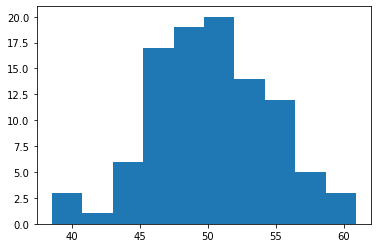

In [30]:
# Visual Normality Checks

# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# histogram plot
pyplot.hist(data)
pyplot.show()

### Teste de Shapiro-Wilk

In [26]:
# Shapiro-Wilk Test

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


### Teste de D'Agostino's K-squared

In [27]:
# D’Agostino’s K^2 Test
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


### Teste de Anderson-Darling

In [28]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


### QQ Plot

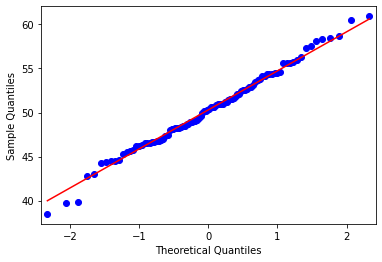

In [29]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# q-q plot
qqplot(data, line='s')
pyplot.show()

### Teste de Jarque-Bera 

Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com  𝐻0  sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.

A estatística de teste é baseada na assimetria (_skewness_) e curtose (_kurtosis_) excessiva da amostra. Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero. Se isso acontecer, então a estatística de teste tem distribuição  𝜒2  com dois graus de liberdade.

No entanto, se a amostra for pequena, podemos ter muitos falsos negativos (Erro Tipo I) ao utilizarmos a distribuição  𝜒2 , ou seja, rejeitamos  𝐻0  quando ela é verdadeira.

Para evitar isso, as implementações costumam utilizar aproximações por Monte-Carlo quando  𝑛  é pequeno, reservando a aproximação  𝜒2  para amostras grandes.

Novamente, é altamente aconselhado complementar o resultado desse teste com um q-q plot.

In [32]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=100)

sct.jarque_bera(normal_data)

(0.6174827345253427, 0.7343706777656298)

Cramér-von-Mises criterion

Lilliefors test for normality 

Pearson's chi-square test

Shapiro-Francia test for normality

## Distribuição Binomial

É a probabilidade de um evento ocorrer dando a uma quantidade finita de eventos.

Podemos definir como um conjunto de dados que claramente não se encaixam em uma função de distribuição de probabilidade padrão. Um exemplo comum, é quando um conjunto de dados tem dois picos(distribuição bimodal) ou muitos picos (distribuição multimodal). Também podemos definir como a distribuição de probabilidade discreta do número de sucessos numa sequência de n tentativas.

Obs: Um dos pontos que diferencia a Binomial da Normal, são as quantidades de tentativas, enquanto uma é finita a outra pode ter um número excessivamente grande ou ser infinita.

Para construir o modelo binomial vamos introduzir uma sequência de ensaios de Bernoulli. Tal sequência é definida por meio das seguintes condições:

    Em cada ensaio considera-se somente a ocorrência ou não-ocorrência de um certo evento que será denominado sucesso (S) e cuja não-ocorrência será denominada falha (F).
    
    Os ensaios são independentes.
    
    A probabilidade de sucesso, que denotaremos por p é a mesma para cada ensaio. A probabilidade de falha será denotada por 1-p.

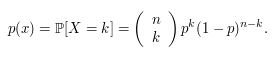

Text(0, 0.5, 'Frequency')

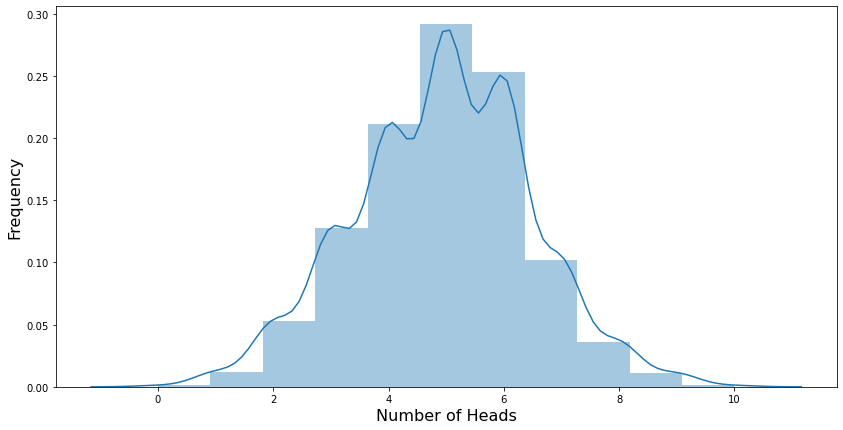

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Número de tentativas
trials = 1000

# Número de experimentos independentes em cada tentativa
n = 10

# Probabilidade de sucesso em cada experimento
p = 0.5

# Função que simula jogar as moedas
# cara é a lista de números de sucesso para cada experimento
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads

# executar a função
heads = run_binom(trials, n, p)

# plotas os resultados no histograma
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)

In [7]:
# Probability of getting 6 heads
runs = 10000
prob_6 = sum([1 for i in np.random.binomial(n, p, size=runs) if i==6])/runs
print('The probability of 6 heads is: ' + str(prob_6))

The probability of 6 heads is: 0.1988


In [8]:
# Call Center Simulation
# Number of employees to simulate
employees = 100
# Cost per employee
wage = 200
# Number of independent calls per employee
n = 50
# Probability of success for each call
p = 0.04
# Revenue per call
revenue = 100
# Binomial random variables of call center employees
conversions = np.random.binomial(n, p, size=employees)
# Print some key metrics of our call center
print('Average Conversions per Employee: ' + str(round(np.mean(conversions), 2)))
print('Standard Deviation of Conversions per Employee: ' + str(round(np.std(conversions), 2)))
print('Total Conversions: ' + str(np.sum(conversions)))
print('Total Revenues: ' + str(np.sum(conversions)*revenue))
print('Total Expense: ' + str(employees*wage))
print('Total Profits: ' + str(np.sum(conversions)*revenue - employees*wage))

Average Conversions per Employee: 2.07
Standard Deviation of Conversions per Employee: 1.29
Total Conversions: 207
Total Revenues: 20700
Total Expense: 20000
Total Profits: 700


## Distribuição Poisson

É uma distribuição de probabilidade de variável aleatória discreta que expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento. Também é baseado em eventos contínuos. 

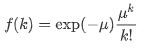

As probabilidades podem ser consideradas:

P(X = x) - quantidade de eventos ser exata no tempo;

P(X < x) - quantidade de eventos ser menor no tempo;

P(X > x) - quantidade de eventos ser maior no tempo;

In [7]:
from scipy.stats import poisson
# Média de acidentes de carro é 2 por dia

# Qual a probabilidade de ocorrerem 3 acidentes no dia? P(X = x)
a = poisson.pmf(3, 2) 
print(f'Quantidade exata: {a * 100}')
# Qual a probabilidade de ocorrerem 3 ou menos acidentes no dia? P(X < x)
b = poisson.cdf(3, 2)
print(f'Menor ou igual: {b * 100}')
# Qual a probabilidade de ocorrerem mais de 3 acidentes no dia? P(X > x)
c = poisson.sf(3, 2)
print(f'Mais que o esperado: {c * 100}')

Quantidade exata: 18.044704431548357
Menor ou igual: 85.7123460498547
Mais que o esperado: 14.287653950145296


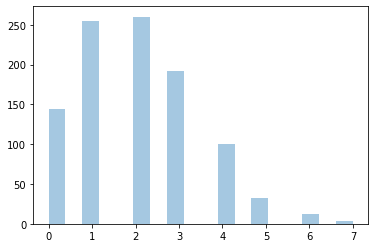

In [78]:
from numpy import random
sns.distplot(random.poisson(lam=2, size=1000), kde=False)
plt.show()

## Máxima Verossimilhança (MLE)

É um método para estimar os parâmetros de um modelo estatístico. Assim, a partir de um conjunto de dados e dado um modelo estatístico, a estimativa por máxima verossimilhança estima valores para os diferentes parâmetros do modelo.

Por exemplo, alguém pode estar interessado na altura de girafas fêmeas adultas, mas devido à restrições de custo ou tempo, medir a altura de todas essas girafas de uma população pode ser impossível. Podemos assumir que as alturas são normalmente distribuídas (modelo estatístico), mas desconhecemos a média e variância (parâmetros do modelo) dessa distribuição. Esses parâmetros da distribuição podem então ser estimados por MLE a partir da medição de uma amostra da população. O método busca aqueles valores para os parâmetros de maneira a maximizar a probabilidade dos dados amostrados, dados o modelo assumido (no caso, distribuição normal).

# Amostragem

O processo de selecionar um grupo de indivíduos de uma população, a fim de estudar e caracterizar a população total.

**• Probabilística:** Uma amostragem é considerada probabilística quando a amostra é obtida de forma aleatória. Com isso, os resultados tornam-se imparciais, pois todos os elementos têm chance conhecida e diferente de “0” de responder à pesquisa.

    Confira alguns tipos de amostragem probabilística:
    
    • Aleatória simples;
    • Sistemática;
    • Conglomerada;
    • Estratificada.

**• Não Probabilística:** A pesquisa não probabilística é uma alternativa quando não temos informações sobre o universo de pesquisa, ou seja, não temos certeza sobre quantos são, nem mesmo as características do público alvo. Outro critério que pode levar a escolha desta técnica é a limitação de recursos financeiros ou mesmo uma limitação de tempo.

    Confira alguns tipos de amostragem não probabilística:

    • Conveniência;
    • Julgamento;
    • Bola de neve;
    • Cotas.

In [15]:
base = pd.read_csv('iris.csv')

np.random.seed(2345)
amostra = np.random.choice(a = [0, 1], size = 150, replace = True, p = [0.5, 0.5])

print(f'Quantidade populacional: {len(amostra)}')
print(f'Quantidade Amostra 1: {len(amostra[amostra == 1])}')
print(f'Quantidade Amostra 0: {len(amostra[amostra == 0])}')

Quantidade populacional: 150
Quantidade Amostra 1: 80
Quantidade Amostra 0: 70
